# Simple Linear Regression

Regression is a family of the regression methods. There many types of regression. But here we will implement the most commonly used regression SLR which has only one input value.

**But** <br>
We are gonna see 2 methods to find the coefs.
1. Formula based (stat in 11th)
2. Gredient Descent based

# 

In [1]:
import numpy, pandas, matplotlib.pyplot as plt

## Formula based

In [2]:
# Takign the book's example
x = [1, 2, 4, 3, 5]
y = [1, 3, 3, 2, 5]

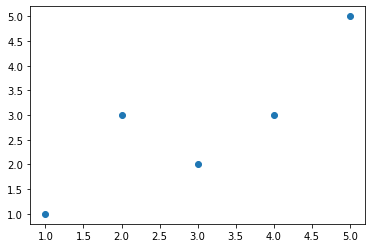

In [3]:
plt.scatter(x, y)

#### MODEL
# $$ \hat y = \beta_0 + \beta_1  x  $$

#### FORMULAE 

# $$ \beta_1 = \frac {\sum((x_i - \bar x) \times (y_i - \bar y))} {\sum (x_i - \bar x)^2} $$

*for slope: B1 = slope*

# $$ \beta_0 = \bar y - \beta_1\bar x $$

*for intercept: B0 = intercept*

# 

#### <center> • • • </center> 

# 

In [4]:
table = pandas.DataFrame({'x': x, 'y': y})
table

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


In [5]:
x_mean = table.x.mean()
y_mean = table.y.mean()

In [6]:
x_mean, y_mean

(3.0, 2.8)

In [7]:
table['xi - mean(x)'] = table.x - x_mean
table['yi - mean(y)'] = table.y - y_mean

In [8]:
table

,x,y,xi - mean(x),yi - mean(y)
0,1,1,-2.0,-1.8
1,2,3,-1.0,0.2
2,4,3,1.0,0.2
3,3,2,0.0,-0.8
4,5,5,2.0,2.2


In [9]:
table['(xi - mean(x)) x (yi - mean(y))'] = table['xi - mean(x)'] * table['yi - mean(y)']

In [10]:
table

,x,y,xi - mean(x),yi - mean(y),(xi - mean(x)) x (yi - mean(y))
0,1,1,-2.0,-1.8,3.6
1,2,3,-1.0,0.2,-0.2
2,4,3,1.0,0.2,0.2
3,3,2,0.0,-0.8,-0.0
4,5,5,2.0,2.2,4.4


In [11]:
table['(xi - mean(x)) ^ 2'] = table['xi - mean(x)'] ** 2

In [12]:
table

,x,y,xi - mean(x),yi - mean(y),(xi - mean(x)) x (yi - mean(y)),(xi - mean(x)) ^ 2
0,1,1,-2.0,-1.8,3.6,4.0
1,2,3,-1.0,0.2,-0.2,1.0
2,4,3,1.0,0.2,0.2,1.0
3,3,2,0.0,-0.8,-0.0,0.0
4,5,5,2.0,2.2,4.4,4.0


Now, that we have all data. We can proceed ahead.

In [13]:
# Slope will be
# Directly putting values in the formula

b1 = table['(xi - mean(x)) x (yi - mean(y))'].sum() / table['(xi - mean(x)) ^ 2'].sum()
b1

0.8

In [14]:
# Intercept will be
# Directly putting values in the formula

b0 = table.y.mean() - b1 * table.x.mean()
b0

0.39999999999999947

# 

### Now the final formula is... 

# $$ \hat y = 0.399 + 0.8x $$  

# Making predictions 

In [15]:
table = table[['x', 'y']].copy()

In [16]:
model = lambda x: 0.399 + 0.8 * x

In [17]:
table['y_hat'] = table.x.apply(model)

In [18]:
table

,x,y,y_hat
0,1,1,1.199
1,2,3,1.999
2,4,3,3.599
3,3,2,2.799
4,5,5,4.399


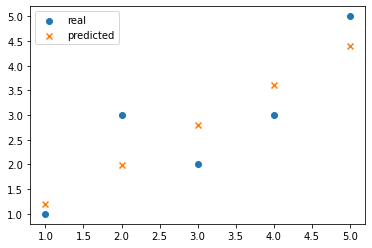

In [19]:
plt.scatter(table.x, table.y, label='real')
plt.scatter(table.x, table.y_hat, marker='x', label='predicted')
plt.legend();

# 

Now each regression model generates an ERROR. We usually count that with *RMSE*.

# $$ RMSE = \sqrt {\frac {\sum (\hat y - y)^2} {n}} $$

In [20]:
numpy.sqrt(((table.y_hat - table.y) ** 2).mean())

0.6928210447150115

*Each prediction is on an average wrong by 0.69 units*

# 

    Now generating a script for so that directly we can use it to compare in other files.

In [47]:
# %%writefile 'SLR_11th.py'
import numpy

class SLR_11th:
    '''
    This is a class for SLR
    Implementation of the simplest formula learnt in 11th
    
    No gredient descent is used.
    
    Usage
    -----
    >>> model = SLR_11th(x, y)
    >>> model.coef
    >>> model.intercept
    
    Note
    ----
    The x and y must be iterable - list, tuple, array, series. 
    '''
    def __init__(self, x, y):
        self.x = numpy.array(x)
        self.y = numpy.array(y)
        
        self.coef = self._calculate_coef()
        self.intercept = self._calculate_inter()
        
    def _calculate_coef(self):
        self._x_mean = self.x.mean()
        self._y_mean = self.y.mean()

        self._xi_xMean = self.x - self._x_mean
        self._yi_yMean = self.y - self._y_mean
        
        self._xi_xM_x_yi_yM = self._xi_xMean * self._yi_yMean
        self._xi_xM2 = self._xi_xMean ** 2
        return self._xi_xM_x_yi_yM.sum() / self._xi_xM2.sum()
    
    def _calculate_inter(self):
        return self._y_mean - self.coef * self._x_mean
    
    def RMSE(self):
        predict = lambda x: self.intercept + self.coef * x
        self._y_hat = numpy.array(list(map(predict, self.x)))
        return numpy.sqrt(((self._y_hat - self.y) ** 2).mean())

Overwriting SLR_11th.py


In [44]:
model = SLR_11th(x, y)

In [45]:
model.coef, model.intercept

(0.8, 0.39999999999999947)

In [46]:
model.RMSE()

0.692820323027551

# 

### So here I guess...
We are highly done with SLR. Let's try it more on some other datasets.

In [48]:
from sklearn.datasets import make_regression

In [49]:
data, _ = make_regression(n_samples = 1000, n_features = 2)

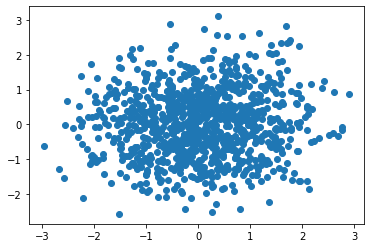

In [50]:
plt.scatter(data[:, 0], data[:, 1])

In [51]:
model = SLR_11th(data[:, 0], data[:, 1])

In [52]:
model.coef

0.063835117356834

In [53]:
model.intercept

0.020415716683667172

In [54]:
model.RMSE()

0.9585045314746021

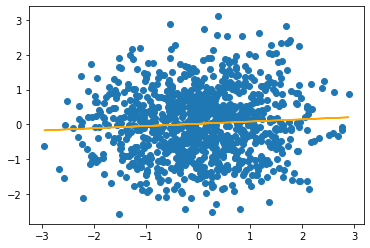

In [64]:
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], model._y_hat, color='orange')

# 

### With sklearn's own LR 

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [70]:
model.fit(data[:, 0, numpy.newaxis], data[:, 1, numpy.newaxis])

LinearRegression()

In [71]:
model.intercept_

array([0.02041572])

In [72]:
model.coef_

array([[0.06383512]])

# BULL***T! 
The same! 

Exactly the same! Like our function! 

    But hey, our function is limited to single x. So - that will be something different. But fine!
    
    We will see you in the next one in which I will calculate the Gredient Descent and then try to find the RL.

# 

Some time comparision...

In [74]:
# Ours
%timeit SLR_11th(data[:, 0], data[:, 1])

87.6 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [79]:
# sklearn's
%timeit LinearRegression().fit(data[:, 0, numpy.newaxis], data[:, 1, numpy.newaxis])

967 µs ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
